In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil
import random
import cv2
import tensorflow as tf

In [4]:
model=tf.keras.models.load_model("emotion_detector")

In [20]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 350, 350, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 flatten_9 (Flatten)         (None, 154880)            0         
                                                                 
 dense_17 (Dense)            (None, 16)                2478096   
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                           

In [21]:
test_img=cv2.imread("final_data/test/Happy/img_Happy_128.jpg")

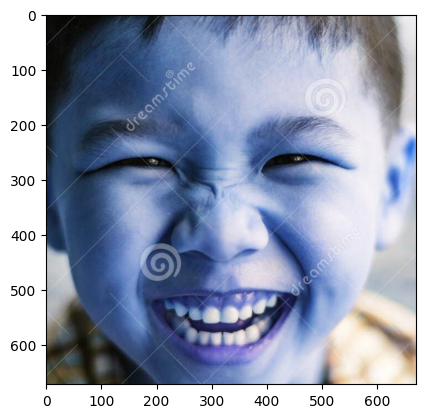

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(671, 671, 3)

In [24]:
test_img_resize=cv2.resize(test_img,(350,350))
test_img_resize.shape

(350, 350, 3)

In [25]:
tf_img=tf.expand_dims(test_img_resize,axis=0)
y_pred=np.argmax(model.predict(tf_img))
y_pred

1/1 [==============================] - 0s 322ms/step


1

In [26]:
labels=['Angry','Happy','Sad']

In [27]:
labels[y_pred]

'Happy'

In [28]:
def pred(img_add, model = model, size = 350):
  labels = ['Angry', 'Happy', 'Sad']
  test_img = cv2.imread(img_add)
  test_img_resize = cv2.resize(test_img, (size,size))
  y_pred_prob = model.predict(tf.expand_dims(test_img_resize,axis = 0))
  max_prob = round(y_pred_prob.max(),2)
  # print(max_prob)
  y_pred = np.argmax(y_pred_prob, axis = -1)[0]

  plt.imshow(test_img[:,:,::-1])
  plt.title(f"prediction - {labels[y_pred]} with {str(max_prob)} %")
  plt.show()


1/1 [==============================] - 0s 279ms/step


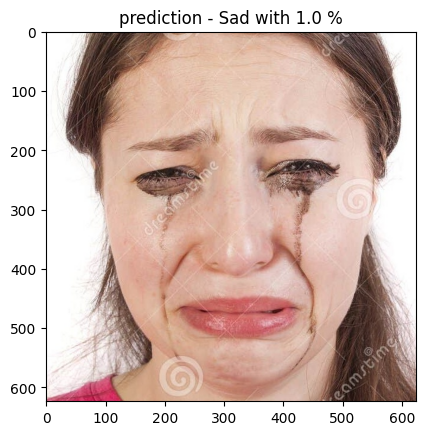

In [29]:
pred("final_data/test/Sad/img_Sad_17.jpg")

In [30]:
my_img=cv2.imread("my_img.jpg")

In [31]:
pred("my_img.jpg")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [32]:
# using webcam

cap = cv2.VideoCapture(0)

face_detector=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
class_names = ["Angry", "Happy", "Sad"]

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    results = face_detector.detectMultiScale(gray,scaleFactor=1.05,minNeighbors=10, minSize=(100, 100))
    if len(results) != 0:
        for x,y,w,h in results:
            img_crp = frame[y:y+h, x:x+w]
            img_crp = cv2.resize(img_crp,(350,350))
            y_pred_prob = model.predict(tf.expand_dims(img_crp, axis = 0))
            y_pred = np.argmax(y_pred_prob, axis = -1)
            print(y_pred_prob)
            label = class_names[int(y_pred)]
            cv2.rectangle(frame, (x,y), (x+w, y+h), color=(0, 255, 0), thickness = 10)
            cv2.putText(frame,f"{label}",(x,y+h),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,255),2)


    cv2.imshow("Face Landmarks", frame)

    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
